cost val : 0.1318095326423645
cost val : 0.03924917057156563
cost val : 0.03386764973402023
cost val : 0.030695373192429543
cost val : 0.02882540039718151
cost val : 0.027723096311092377
cost val : 0.027073314413428307
cost val : 0.02669028379023075
cost val : 0.026464492082595825
cost val : 0.02633139118552208
[65.46391]
0.575
[45.56226]
LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.80232442621049e-22, stderr=0.19448560867502498)
45.39378577269011


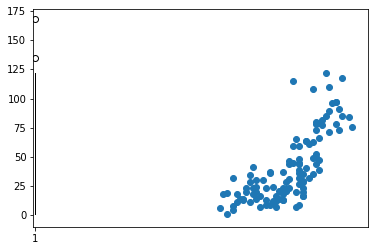

In [7]:
import pandas as pd
import numpy as np
#import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf


# 1. data loading (raw data loading)
df = pd.read_csv("./data/ozone.csv")

# 2 . data pre processing 
# 2-1. 필요한 col 부터 추출
df = df[["Ozone", "Temp"]] # (153.2)

# 2-2. 결측치 처리
#df.shape
df = df.dropna(how="any", inplace=False ) # 116.2

# 2-3. 이상치 처리 (IRQ) Turkey Fence
# 이상치 존재하는 확인 => 박스플롯 확인 
plt.boxplot(df["Ozone"])

# IQR 
# IQR = 3rd quat - 1st quat

q1,q3 = np.percentile(df["Ozone"],[25,75])

iqr = q3-q1
upper = q3 + iqr * 1.5 # 상위 이상치 처리

mask = df["Ozone"] > upper # boolean mask 를 생성 


df = df.loc[~mask]

#df

# 2-4. 데이터 선형적 관계에 잇는지 를 확인 
# scatter

plt.scatter(df["Temp"], df["Ozone"])

# 2-5. 정형화 표준화를 이용해서 데이터 스케일 변환
# 정규화(Normalization) = (요소값 - 최소값) / (최대값 - 최소값)
# => 0 ~ 1 사이 값으로 scale 

# 표준화(Standardization) = (요소값 - 평균) / 표준편차

# 정규화방식을 이용해서 데이터 변형
# 일반적으로 모듈을 이용 우리는 프로그램으로 처리 

df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())

df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min())

# 학습에 적합한 데이터를 완성 

# 머신 러닝 (텐서 플로우)

# import tensorflow as tf
# import scipy as sc
# import numpy as np
# import pandas as pd


# 학습에 적합한 데이터를 완성
# machine learning (Tensorflow)

# 1. training data set
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

# 2. placeholder
x = tf.placeholder(dtype = tf.float32 )
y = tf.placeholder(dtype = tf.float32 )

# 3. Weight & Bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 4. Hypothesis
H = W * x + b

# 5. cost function
cost = tf.reduce_mean(tf.square(H-y))
# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 7. session, 초기화
sess = tf.Session()

sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                          feed_dict={ x : x_data,
                                      y: y_data})
    
    if step % 300 == 0:
        print("cost val : {}".format(cost_val))

##########################
# 최적의 W와 b를 구했어요! -> 가설 완성
# prediction
# 온도가 (화씨)80 Ozone량 알아봄
print(sess.run(H, feed_dict={x : 80}))

# 이렇게 처리하면 문제가 없어요
# 80이란 온도를 0~1사이의 값으로 스케일
tmp = (80 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
print(tmp)

result_scale = sess.run(H, feed_dict={ x: tmp}) # 0.36 (ozone)
result = result_scale * (df["Ozone"].max() - df["Ozone"].min()) + df["Ozone"].min()
print(result) # 45

########################################
# scipy 스탯 모듈을 이용해서 편하게 처리
x = df["Temp"]
y = df["Ozone"]

result = stats.linregress(x,y)
print(result)
print(80*result[0] + result[1])






In [22]:
# scipy 스탯 모듈을 이용해서 편하게 처리
x = df["Temp"]
y = df["Ozone"]

result = stats.linregress(x,y)
print(result)
print(result[0])
print(80*result[0] + result[1])


LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.80232442621049e-22, stderr=0.19448560867502498)
2.344807849550286
45.39378577269011


In [8]:
#####################################
## 퀴즈 성적을 이용한 최종시험성적 예측
## 사용하는 데이터
## 퀴즈1 퀴즈2 퀴즈3 최종성적
##  73   80    75    152
##  93   88    93    185
##  89   91    90    180
##  96   98   100    196
##  73   66    70    142
##  80   90    50    ??

#
# training data set
#x_data = df["Temp"]
x_data =[[73,80,75],
   [93,88,93],
   [89,91,90],
   [96,98,100],
   [73,66,70]]

y_data = [[152],[185],[180],[196],[142]] 

# placeholder
# 학습시켜볼 행의 개수가 확실치 않을 때 특정 행 개수 대신 None을 넣어줄 수 있따
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & Bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = W * x + b

# 다중 선형회귀 구조는 이렇게 수식을 세워야 됨
# H = X * W + b (표현식)
H = tf.matmul(X,W) + b

# Cost function
# 여기서부터는 동일
cost = tf.reduce_mean()